# CUSTOMER ANALYTICS

Predicting if purchase probability of a customer depends on age and Estimated salary where I use the following feature variables
1. Age – Estimated Age of our customer 
2. Estimated salary of the customer
and for my binary target variable 
3. Purchased where 1 indicates a purchase and 0 means a non-purchase 

Other Variables:
4. User Id – This is the unique identifier of every customer that visits our store
5. Gender – Sex of the customer


## Hypothesis
**Age**: The higher the age the higher chance making a purchase

**Estimated Salary**: Customers with a high income have a higher chance of making a purchase

In [3]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
## read the data

customer_data = pd.read_csv('social_network_ads.csv')


In [5]:
customer_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
customer_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Exploratory Data Analysis

In [9]:
customer_data.shape

(400, 5)

In [12]:
## check whether the data contains empty values
customer_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [18]:
customer_data[['Age','EstimatedSalary']].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [20]:
customer_data.groupby('Gender')[['Age']].describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Gender                                                           
Female  204.0  38.411765  10.859019  18.0  30.0  37.5  47.0  60.0
Male    196.0  36.867347  10.043636  18.0  29.0  36.5  42.0  60.0

In [21]:
customer_data.groupby('Gender')[['EstimatedSalary']].describe()

EstimatedSalary                                                         \
                 count          mean           std      min      25%      50%   
Gender                                                                          
Female           204.0  71759.803922  35595.236189  15000.0  44000.0  70500.0   
Male             196.0  67642.857143  32421.819181  15000.0  43000.0  68000.0   

                           
            75%       max  
Gender                     
Female  90750.0  150000.0  
Male    86000.0  150000.0

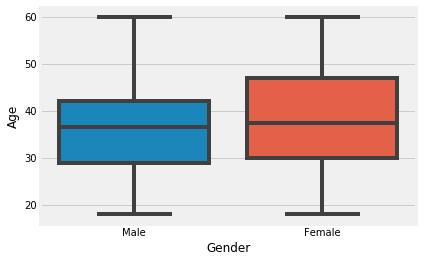

In [26]:
sns.boxplot(data=customer_data,x = 'Gender', y = 'Age')

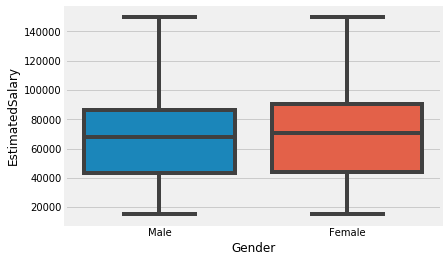

In [27]:
sns.boxplot(data=customer_data,x = 'Gender', y = 'EstimatedSalary')

### Scatter plot

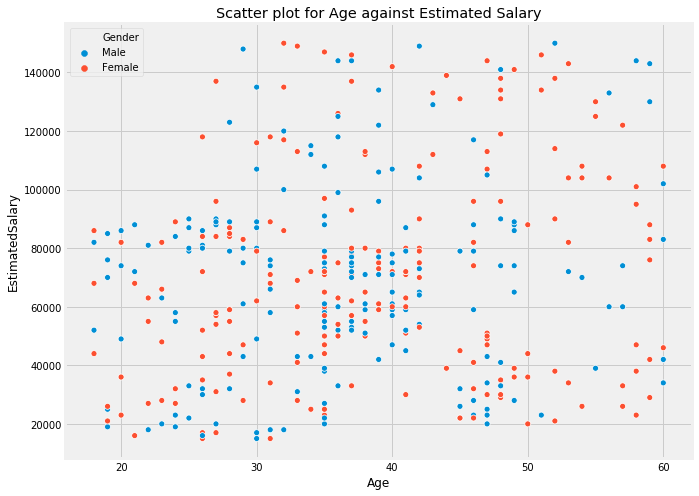

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=customer_data,x='Age',y='EstimatedSalary', hue='Gender')
plt.title('Scatter plot for Age against Estimated Salary')
plt.show()

In [32]:
bins = [0,30,40,50,60]
#group=['Young(0- 30)', 'Middle(30 - 40)','Slightly old (40 - 50)', 'Old (50-60)']
customer_data['Age_group'] = pd.cut(customer_data['Age'],bins)#,labels=group
customer_data

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_group
0,15624510,Male,19,19000,0,"(0, 30]"
1,15810944,Male,35,20000,0,"(30, 40]"
2,15668575,Female,26,43000,0,"(0, 30]"
3,15603246,Female,27,57000,0,"(0, 30]"
4,15804002,Male,19,76000,0,"(0, 30]"
5,15728773,Male,27,58000,0,"(0, 30]"
6,15598044,Female,27,84000,0,"(0, 30]"
7,15694829,Female,32,150000,1,"(30, 40]"
8,15600575,Male,25,33000,0,"(0, 30]"
9,15727311,Female,35,65000,0,"(30, 40]"


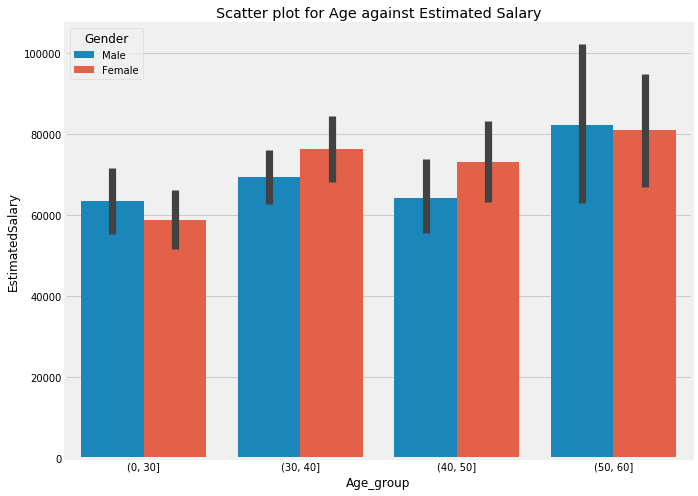

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(data=customer_data,x='Age_group',y='EstimatedSalary', hue='Gender')
plt.title('Scatter plot for Age against Estimated Salary')
plt.show()

## Model Building

In [34]:
customer_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_group
0,15624510,Male,19,19000,0,"(0, 30]"
1,15810944,Male,35,20000,0,"(30, 40]"
2,15668575,Female,26,43000,0,"(0, 30]"
3,15603246,Female,27,57000,0,"(0, 30]"
4,15804002,Male,19,76000,0,"(0, 30]"


In [35]:
# selecting the variables
x = customer_data.iloc[:, [2,3]].values # the independent variables
y = customer_data.iloc[:,4].values # the dependent variables

In [40]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(x)


In [41]:
X_std[0:4]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169]])

In [38]:
x[0:4]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000]], dtype=int64)

In [62]:
y.shape

(400,)

In [42]:
#Split our dataset into train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X_std, y, random_state = 0, test_size = 0.2)

In [44]:
## fiting the train dataset
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0, solver = 'lbfgs')
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
## performance of our model
y_predict = model.predict(X_test)

In [68]:
y_predict[0]

0

In [60]:
Y_test[31]

1

In [53]:
model.coef_

array([[2.03510232, 1.06602972]])

In [67]:
var_prob = model.predict_proba(X_test)
var_prob[0, :]

array([0.87359033, 0.12640967])

In [85]:
## Accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
conf_mat = confusion_matrix(Y_test, y_predict)
conf_mat

array([[57,  1],
       [ 5, 17]], dtype=int64)

#### From the above, we have 57 and 17 correct predictions and 1 and 5 incorrect predictions

In [86]:
acc_score = accuracy_score(Y_test, y_predict)
print(f"Accuracy score is: {(acc_score)*100}%")

Accuracy score is: 92.5%


In [87]:
precision_score = precision_score(Y_test, y_predict)
print(f"Precision score is: {(precision_score)*100}%")
#How often the prediction is correct
#When the model predicts a customer purchasing, customers will actually be purchasing  94% of the time

Precision score is: 94.44444444444444%


In [88]:
print(f"Recall score: {100*(recall_score(Y_test, y_predict))}%")
#For customers who purchase in the test set, the model can identify a purchase 77.3%  of the time

Recall score: 77.27272727272727%


In [89]:
roc_auc_score(Y_test, y_predict)

0.877742946708464

## Using Multinominal Regression

In [91]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)


In [92]:
softmax_reg.fit(X_train,Y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
sft_pred = softmax_reg.predict(X_test)

In [94]:
softmax_reg.coef_

array([[1.09518319, 0.57295049]])

In [95]:
print(f"Accuracy score: {100*(accuracy_score(Y_test,sft_pred))}%")

Accuracy score: 91.25%


In [96]:
confusion_matrix(Y_test, sft_pred)

array([[56,  2],
       [ 5, 17]], dtype=int64)

#### From the above, we have 56 and 17 correct predictions and 2 and 5 incorrect predictions

In [119]:
from sklearn.metrics import precision_score, recall_score
print(f"Precision score: {100*(precision_score(Y_test, sft_pred))}%")
#How often the prediction is correct
#When the model predicts a customer purchasing, customers will actually be purchasing  89% of the time

Precision score: 89.47368421052632%


## Using Naives Bayes Model

In [104]:
from sklearn.naive_bayes import GaussianNB

In [109]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [110]:
naive_pred = classifier.predict(X_test)

In [111]:
classifier.class_count_

array([199., 121.])

In [113]:
print(f"Accuracy score: {100*(accuracy_score(Y_test, naive_pred))}%")

Accuracy score: 91.25%


In [114]:
confusion_matrix(Y_test, naive_pred)

array([[55,  3],
       [ 4, 18]], dtype=int64)

#### From the above, we have 55 and 18 correct predictions and 4 and 3 incorrect predictions

In [120]:
from sklearn.metrics import precision_score, recall_score
print(f"Precision score: {100*(precision_score(Y_test, naive_pred))}%")
#How often the prediction is correct
#When the model predicts a customer purchasing, customers will actually be purchasing  85% of the time

Precision score: 85.71428571428571%


In [122]:
print(f"Recall score: {100*(recall_score(Y_test, naive_pred))}%")
#For customers who purchase in the test set, the model can identify a purchase 81%  of the time

Recall score: 81.81818181818183%


In [123]:
roc_auc_score(Y_test, naive_pred)
#Close to 1 so a good classifier

0.8832288401253919

## Target Variable EDA

In [128]:
bought = customer_data.loc[customer_data['Purchased']== 1]
no_buy = customer_data.loc[customer_data['Purchased']== 0]

In [131]:
bought[['Age', 'EstimatedSalary']].describe()

,Age,EstimatedSalary
count,143.000000,143.000000
mean,46.391608,86272.727273
std,8.612172,42064.200064
min,27.000000,20000.000000
25%,39.500000,41000.000000
50%,47.000000,90000.000000
75%,53.000000,122500.000000
max,60.000000,150000.000000


In [132]:
no_buy[['Age', 'EstimatedSalary']].describe()

,Age,EstimatedSalary
count,257.000000,257.000000
mean,32.793774,60544.747082
std,7.985844,24351.570102
min,18.000000,15000.000000
25%,26.000000,44000.000000
50%,34.000000,61000.000000
75%,38.000000,77000.000000
max,59.000000,141000.000000


In [133]:
customer_data.groupby('Purchased')[['Age']].describe()

Age                                                   
           count       mean       std   min   25%   50%   75%   max
Purchased                                                          
0          257.0  32.793774  7.985844  18.0  26.0  34.0  38.0  59.0
1          143.0  46.391608  8.612172  27.0  39.5  47.0  53.0  60.0

In [134]:
customer_data.groupby('Purchased')[['EstimatedSalary']].describe()

EstimatedSalary                                                \
                    count          mean           std      min      25%   
Purchased                                                                 
0                   257.0  60544.747082  24351.570102  15000.0  44000.0   
1                   143.0  86272.727273  42064.200064  20000.0  41000.0   

                                        
               50%       75%       max  
Purchased                               
0          61000.0   77000.0  141000.0  
1          90000.0  122500.0  150000.0

In [136]:
Gender = pd.crosstab(customer_data['Gender'],customer_data['Purchased'])
Gender

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [139]:
Gender.values

array([[127,  77],
       [130,  66]], dtype=int64)

In [142]:
Gender['conversion_rate'] = [100*(i[1]/(i[1]+i[0])) for i in Gender.values]
Gender

Purchased,0,1,conversion_rate
Gender,,,
Female,127,77,37.745098
Male,130,66,33.673469


In [145]:
Gender2 = Gender.drop([ 'conversion_rate'], axis=1)

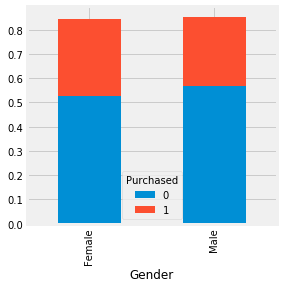

In [146]:
#.div...elementwise division of the dataframe for each index,axis=0
#.sum...Return the sum of the values for the requested axis 1 being column
#basically find the sum of each row Female and Male and then for the respective columns 0, 1, divide by the sum of the row
Gender2.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

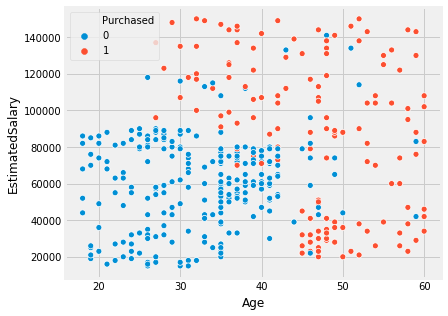

In [147]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=customer_data,x='Age',y='EstimatedSalary', hue='Purchased')


In [148]:
X = customer_data.iloc[:,[2,3]]#Independent feature variables
X.corr(method='pearson')

,Age,EstimatedSalary
Age,1.000000,0.155238
EstimatedSalary,0.155238,1.000000


([<matplotlib.axis.YTick at 0x2521ba688d0>,
 <a list of 5 Text yticklabel objects>)

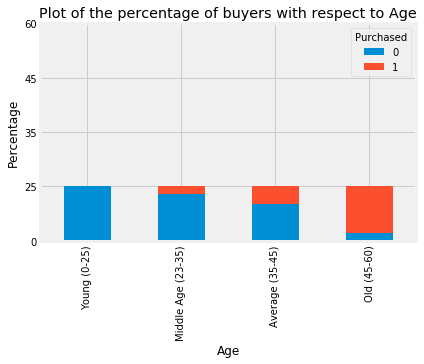

In [149]:
bins = [0, 25, 35, 45, 60]
group = ['Young (0-25)', 'Middle Age (23-35)', 'Average (35-45)', 'Old (45-60)']
customer_data['Age_bin'] = pd.cut(customer_data['Age'],bins,labels=group)

Age_bin = pd.crosstab(customer_data['Age_bin'],customer_data['Purchased'])
Age_bin.div(Age_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Plot of the percentage of buyers with respect to Age')
tick_marks = np.arange(len(bins))
plt.yticks(tick_marks, bins)



Text(0, 0.5, 'Percentage')

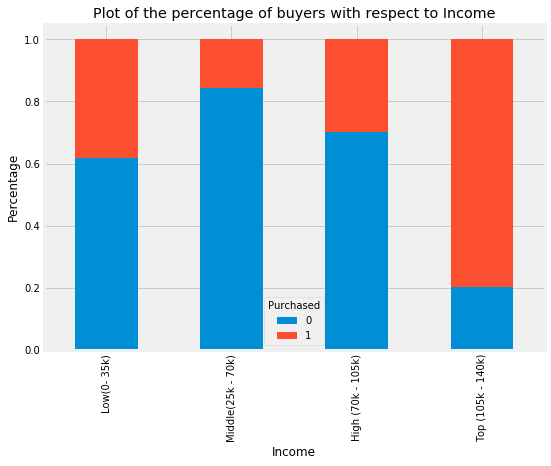

In [154]:
bins=[0,35000,70000,105000,140000]
group=['Low(0- 35k)', 'Middle(25k - 70k)','High (70k - 105k)','Top (105k - 140k)']
customer_data['Income_bin'] = pd.cut(customer_data['EstimatedSalary'],bins,labels=group)

Income_bin =pd.crosstab(customer_data['Income_bin'], customer_data['Purchased'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize = (8,6))
plt.title('Plot of the percentage of buyers with respect to Income')
plt.xlabel('Income')
plt.ylabel('Percentage')

In [155]:
df=customer_data.drop(['Age_bin','Income_bin'], axis=1)

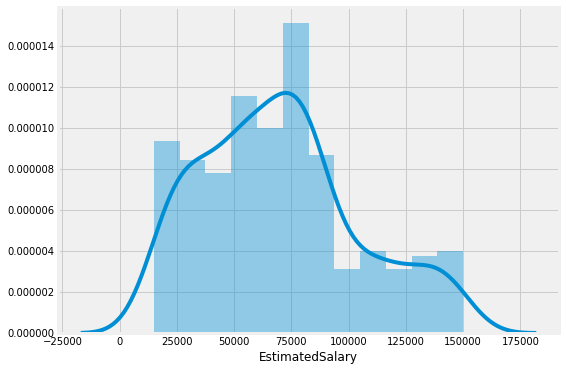

In [156]:
fig=plt.figure(figsize=(8,6))
sns.distplot(df['EstimatedSalary'])

Text(0.5, 18.5, 'Predicted label')

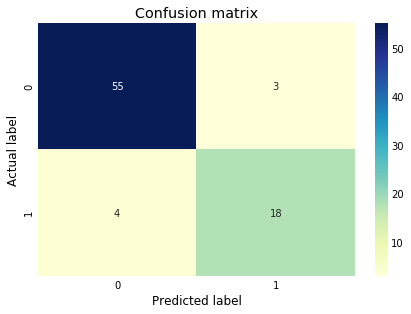

In [157]:
cnf_matrix = confusion_matrix(Y_test,naive_pred)
class_names = [0,1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')